In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from data.Data_loader import GravitationalWave_datastrain as GW_DS

/data/gravwav/jlangend/.conda/envs/NAME_ENV/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = '/data/gravwav/lopezm/ML_projects/Projects_2022/Project_2/Data'
data = GW_DS(path)


In [6]:
from neural.CNN import CNN as CNN

#Dataset, Truth_values = data.make_dataset(50)

def gaus(bins, sigma, mu):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
gaus_array1 = np.repeat([gaus(np.linspace(-50,50,101),1,0)],3,axis=0)
gaus_array2 = np.repeat([gaus(np.linspace(-50,50,101),0.5,0)],3,axis=0)
kernels = torch.tensor(np.array([gaus_array1]))

Net = CNN(3, len(kernels), len(kernels[0]))
Net.set_kernel(kernels)


TypeError: cat() received an invalid combination of arguments - got (Tensor, dim=int), but expected one of:
 * (tuple of Tensors tensors, int dim, *, Tensor out)
 * (tuple of Tensors tensors, name dim, *, Tensor out)


In [ ]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net.parameters(), lr=0.001, momentum=0.9)

In [5]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    num_iterations = 10
    num_batch = 50
    for i in range(num_iterations):
        # get the inputs; data is a list of [inputs, labels]
        loaded_data, labels = Dataset, Truth_values = data.make_dataset(num_batch)
        inputs = np.swapaxes(np.array(loaded_data)[0:3],0,1)
        inputs = torch.tensor(inputs)
        print(inputs.shape)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = Net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

torch.Size([100, 3, 65536])


RuntimeError: Given groups=3, expected weight to be at least 3 at dimension 0, but got weight of size [1, 3, 101] instead

In [3]:
#i=data[0:4]
#print(i[0])
#j=data[0]
#print(j)
k=data[[0,4,5]]
print(k[0])


[[ -14.58548037   -2.69804711    1.12656928 ...  -33.84624601
  -107.39217599  -68.56535156]
 [  20.03635344  -25.13563951  -18.93621603 ...  -89.61155025
    38.025489     82.54389329]
 [ -46.40620737   42.37647423  -70.88688374 ...   -8.36291292
   -25.51189016   52.82384149]]


In [4]:
np.random.seed(123)
size = 500

random_draw = np.random.randint(0,10000, size)
shuffle_array = np.arange(size*2)
np.random.shuffle(shuffle_array)
#print(random_draw,'\n', shuffle_array)

data.background = False
injections = np.array(data[list(random_draw)])
#print(injections[2,0])
data.background = True
backgrounds = np.array(data[list(random_draw)])
#print(backgrounds.shape)

dataset = np.concatenate([injections,backgrounds],1)
#print(dataset.shape)
dataset = dataset[:, shuffle_array,:]
#print(dataset[2,38])

truth_values = np.concatenate([np.ones(size),np.zeros(size)])[shuffle_array]
#print(truth_values)

Dataset = torch.tensor(dataset)
#print(Dataset)

In [6]:
np.random.seed(123)

Dataset, Truth_values = data.make_dataset(500)
print(Dataset, '\n',Truth_values)

tensor([[[ 2.7445e+01, -1.0302e+01, -5.4854e+01,  ...,  2.3429e+01,
          -2.3225e+01,  3.1541e+01],
         [-6.5425e+01, -1.0459e+01, -5.4118e+01,  ...,  1.9847e+02,
          -2.7064e+01,  9.8828e+01],
         [-9.5726e-01, -1.0274e+02, -4.7709e+01,  ..., -9.6895e+01,
          -9.1366e+00, -2.3427e+01],
         ...,
         [-8.5731e+00, -4.3232e+01, -4.3512e+01,  ...,  1.1948e+01,
           1.7945e+01, -8.8699e+01],
         [-6.0140e+01,  1.4328e+01, -3.1812e+01,  ...,  6.4643e+01,
          -4.8909e-01, -1.0017e+01],
         [-1.3261e+02,  4.1182e+01,  3.4252e+01,  ...,  4.0089e+00,
           4.9301e+00, -5.3838e+01]],

        [[-3.6882e+01, -2.5234e+01, -2.3361e+01,  ...,  2.9722e+01,
           7.2922e+01, -1.0715e+02],
         [-8.8349e+01, -7.2298e+01,  6.1775e+01,  ..., -2.4197e+01,
           1.5861e+02, -4.7370e+01],
         [-1.2165e+01,  3.9119e+01,  3.1549e+01,  ..., -1.0509e+02,
           7.9075e+01, -4.0405e+01],
         ...,
         [ 5.8840e+01,  3

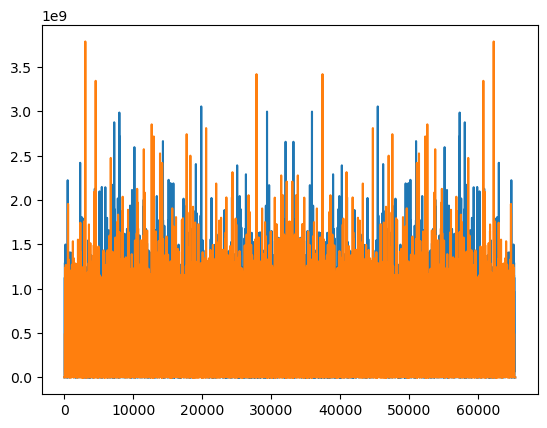

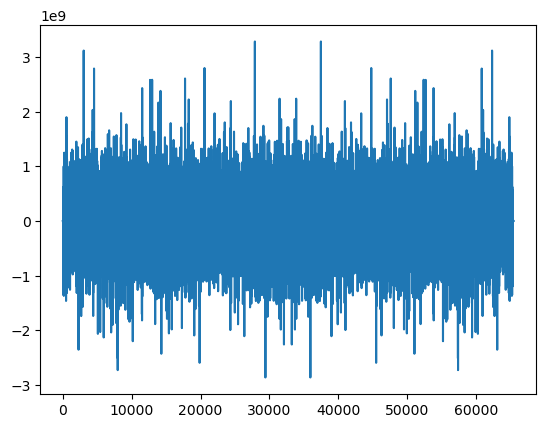

In [6]:
ID=234

data.background=False

x= data[ID][0]
xfft = np.fft.fft(x)
plt.plot(np.abs(xfft[100::])**2)

data.background=True

x= data[ID][0]
xfft1 = np.fft.fft(x)
plt.plot(np.abs(xfft1[100::])**2)
plt.show()

plt.plot(np.abs(xfft1[100::])**2-np.abs(xfft[100::])**2)

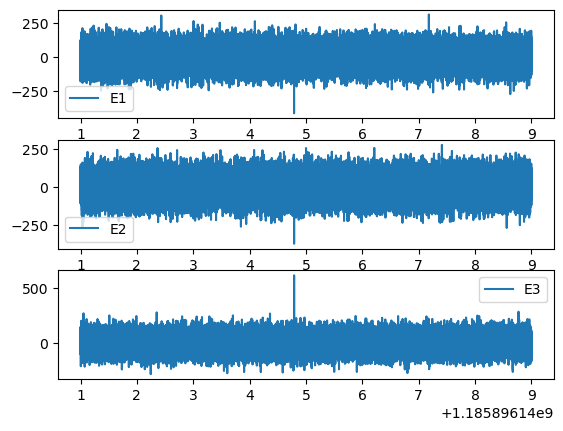

In [7]:
drawID = 343
fig, ax = plt.subplots(3,1)
for i in [1,2,3]:
    ax[i-1].plot(injections[3][drawID],injections[i-1][drawID], label=f'E{i}')
    ax[i-1].legend()


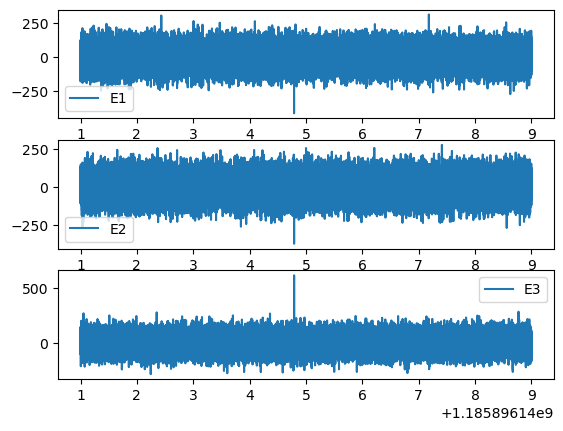

In [8]:
eventID = int(random_draw[drawID])
data.background = False
fig, ax = plt.subplots(3,1)
for i in [1,2,3]:
    ax[i-1].plot(data[eventID][3],data[eventID][i-1], label=f'E{i}')
    ax[i-1].legend()

In [9]:
import numpy as np
x = np.arange(225)

y=np.reshape(x,(5,3,15))
print(y)

transformed = y.transpose(1,2,0) 
print(transformed)

E1,E2,E3 = transformed
print(E1.T)


[[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
  [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29]
  [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44]]

 [[ 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59]
  [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74]
  [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89]]

 [[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
  [105 106 107 108 109 110 111 112 113 114 115 116 117 118 119]
  [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134]]

 [[135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
  [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164]
  [165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]]

 [[180 181 182 183 184 185 186 187 188 189 190 191 192 193 194]
  [195 196 197 198 199 200 201 202 203 204 205 206 207 208 209]
  [210 211 212 213 214 215 216 217 218 219 220 221 222 223 224]]]
[[[  0  45  90 135 180]
  [  1